In [8]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np

def load_syn(noise):
    D = np.load(f"datasets/synth/synth_100_{noise:.2}.npy")
    X, l = D[:, :-1], D[:, -1]
    return X, l

n_noise = np.round(np.arange(0, 1.01, 0.1), 1)
synth_noise_datasets = [[load_syn(noise)] for noise in n_noise]

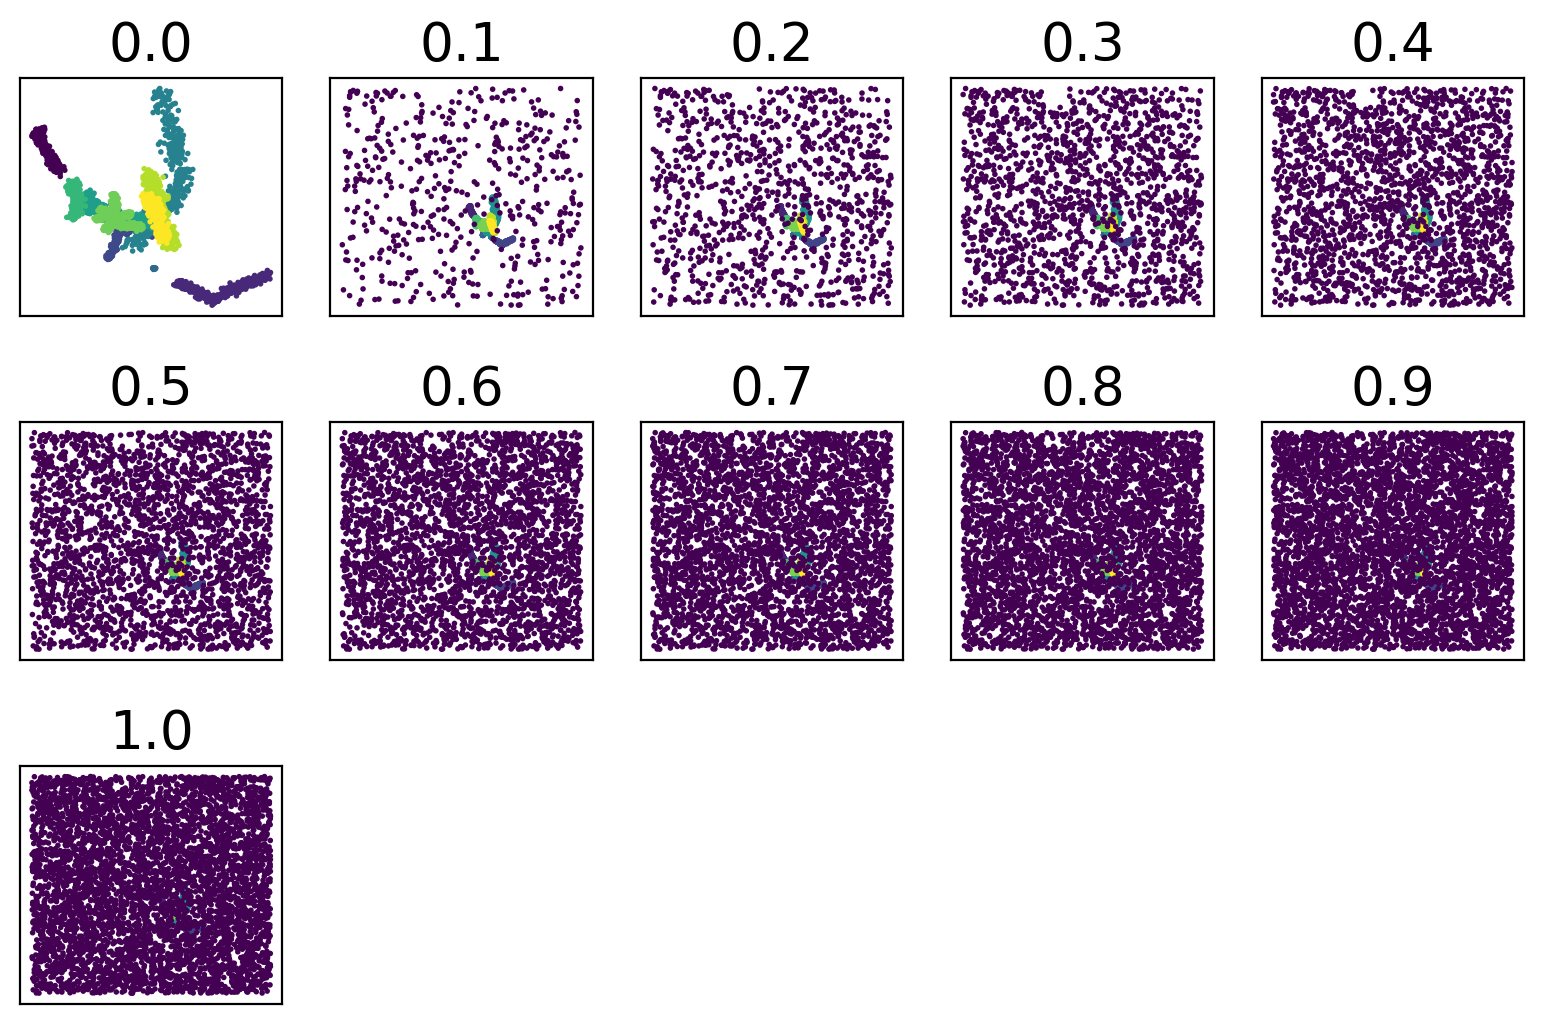

In [10]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

plot_datasets(synth_noise_datasets, n_noise, n_cols=5, figsize=1.6)
plt.savefig("imgs/Synth_noise_data.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

In [11]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df, SELECTED_METRICS


eval_results = cache(
    "Synth_noise",
    calc_eval_measures_for_multiple_datasets,
    [synth_noise_datasets, n_noise],
    recalc=False,
)

selected_metrics = ["DISCO", "DBCV", "LCCV", "CVNN"]

df = create_and_rescale_df(eval_results, selected_metrics=selected_metrics)

In [12]:
# import pandas as pd
# df_nonscaled = pd.DataFrame(eval_results)

# df_nonscaled.groupby(["dataset", "measure"]).value.mean().to_latex("latex/Synth_noise_values.tex")
# df_nonscaled.groupby(["dataset", "measure"]).value.mean().groupby("measure").mean().to_latex(
#     "latex/Synth_noise_values_mean.tex"
# )
# df_nonscaled.groupby(["dataset", "measure"]).value.mean().groupby("measure").min().to_latex(
#     "latex/Synth_noise_values_min.tex"
# )
# df_nonscaled.groupby(["dataset", "measure"]).value.mean().groupby("measure").max().to_latex(
#     "latex/Synth_noise_values_max.tex"
# )

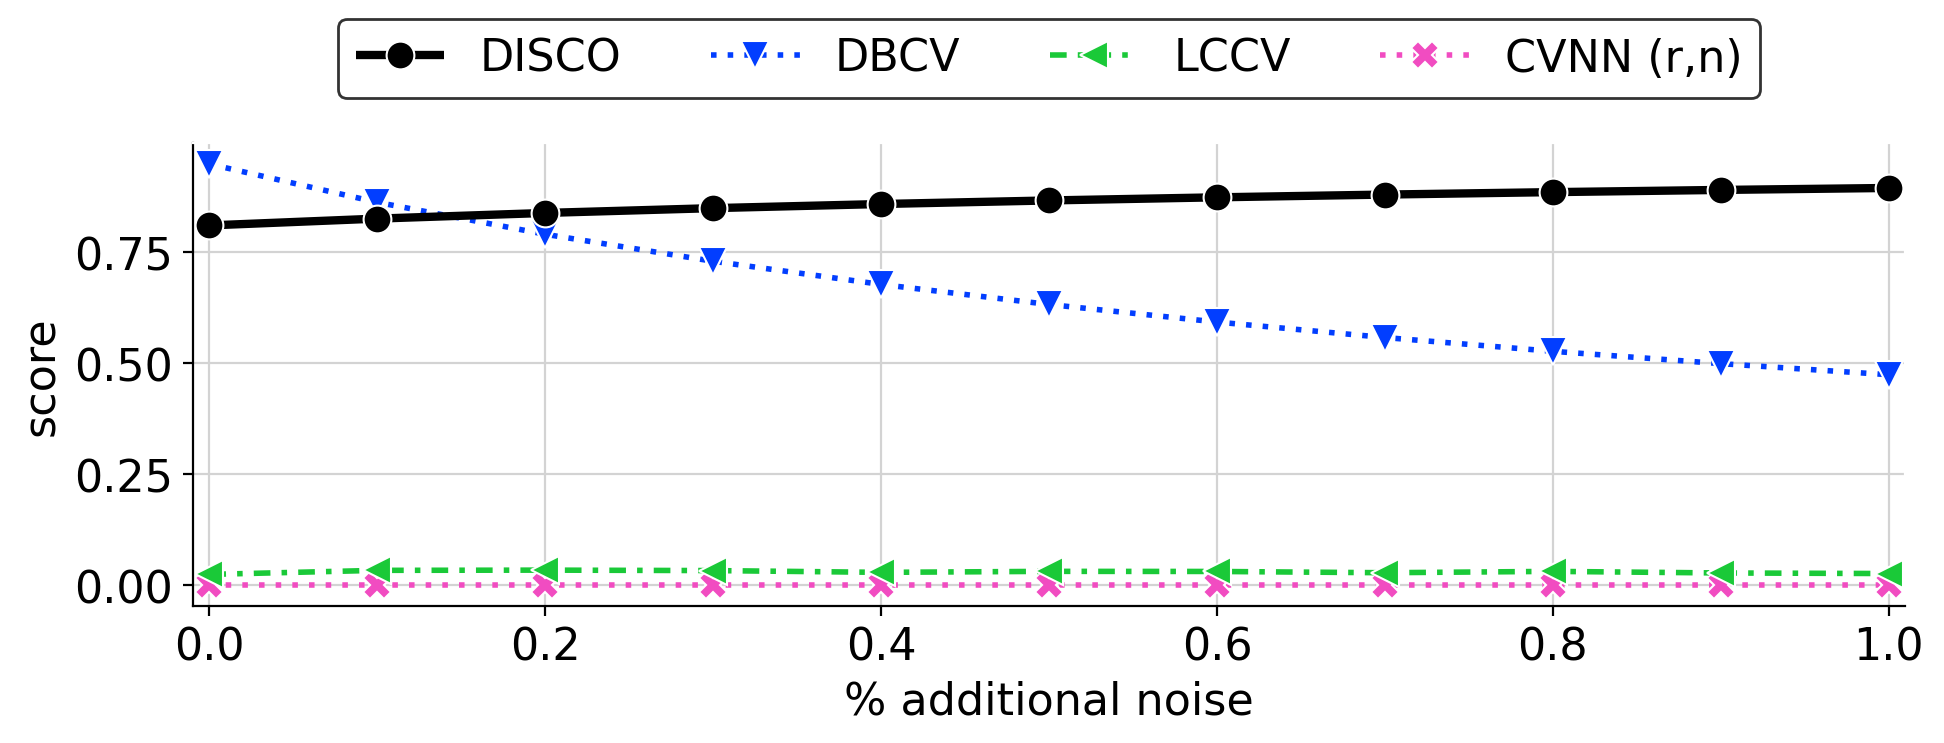

In [14]:
from src.utils.plots import plot_lineplot, GRAY
import seaborn as sns

eps = 0.01
x_range = n_noise[0] - eps, n_noise[-1] + eps

fig = plot_lineplot(
    df,
    "dataset",
    "value",
    "measure",
    x_label="% additional noise",
    y_label="score",
    x_range=x_range,
    y_range=(None, None),
    figsize=(10, 4),
    palette=["black"] + list(np.array(sns.color_palette("bright"))[[0, 2, 6]]) + [GRAY],
    markers=["o"] + list(np.array(["v", "^", "<", ">", "p", "P", "X", "d", "D", "H"])[[0, 2, 6]]),
    dashes=[(1, 0)] + list(np.array([(1, 2), (4, 2), (3, 2, 1, 2)], dtype=object)[[0, 2, (6 % 3)]]),
    sizes=[3] + [2] * 10,
    markersize=10,
)
ax = fig.gca()
# ax.set_xticks(range(0, 16, 3))
plt.savefig("imgs/Synth_noise.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

In [16]:
import pandas as pd
from src.utils.metrics import DISCO

from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets, exec_func


min_points_list = range(1, 32, 2)

MIN_POINTS_DISCO = {
    min_points: lambda X, l, min_points=min_points: DISCO(X, l, min_points=min_points)
    for min_points in min_points_list
}

eval_results = cache(
    "Synth_noise_DISCO_min_points",
    calc_eval_measures_for_multiple_datasets,
    [synth_noise_datasets, n_noise],
    {"metrics": MIN_POINTS_DISCO, "n_jobs": 64},
    recalc=False,
)

df = pd.DataFrame(data=eval_results)

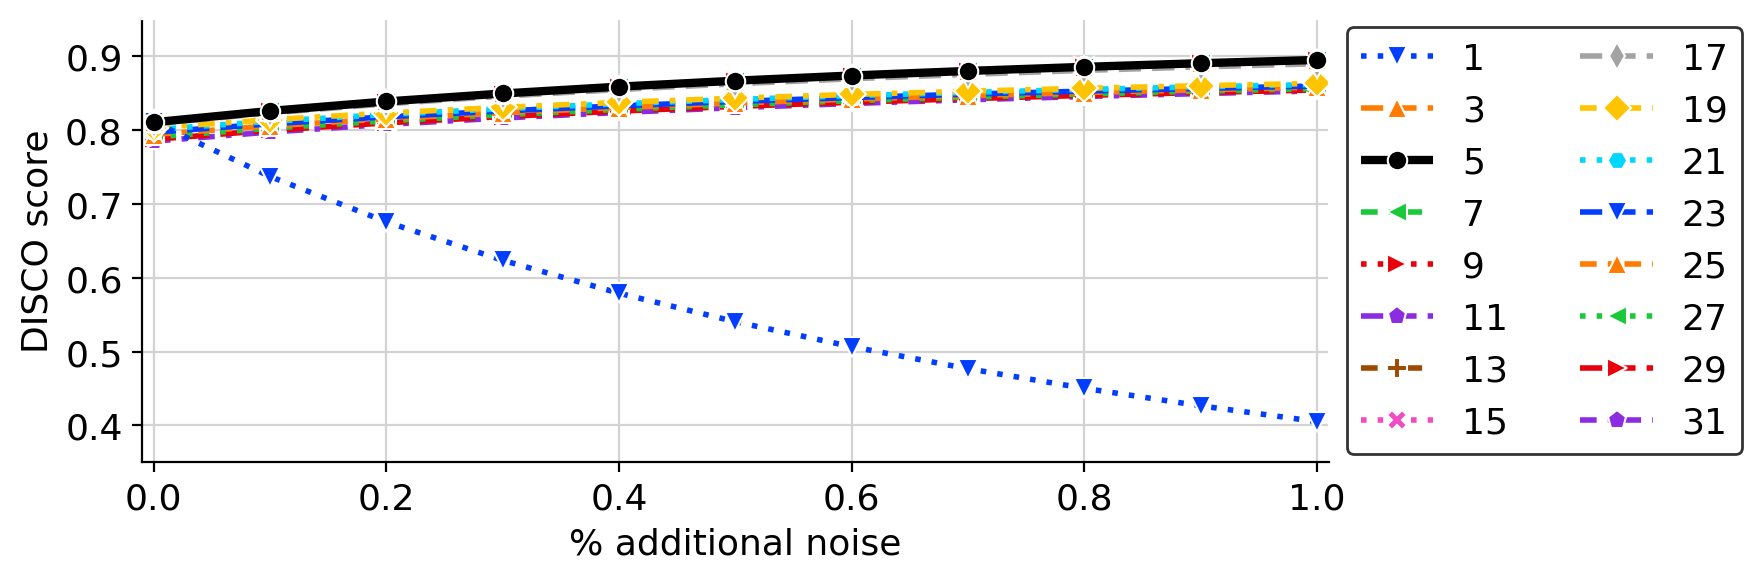

In [17]:
from src.utils.plots import plot_lineplot

eps = 0.01
x_range = n_noise[0] - eps, n_noise[-1] + eps
df = df.rename(columns={"dataset": "noise"})

fig = plot_lineplot(
    df,
    "noise",
    "value",
    "measure",
    x_label="% additional noise",
    y_label="DISCO score",
    x_range=x_range,
    y_range=(0.35, 0.95),
    highlight=3,
    font_size=13,
    errorbar=None,
    order=None,
    ncol=2,
    row_wise=False,
    figsize=(9, 3.1),
    sizes=[3] + [2] * 20,
    markersize=7,
)
ax = fig.gca()
leg = ax.get_legend()
leg.set_loc("center left")
leg.set_bbox_to_anchor((1, 0.5))
plt.savefig("imgs/Synth_noise_DISCO_min_points.pdf", format="pdf", bbox_inches="tight", pad_inches=0)